<a href="https://colab.research.google.com/github/mahtoabhijeet/turn/blob/main/tubules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

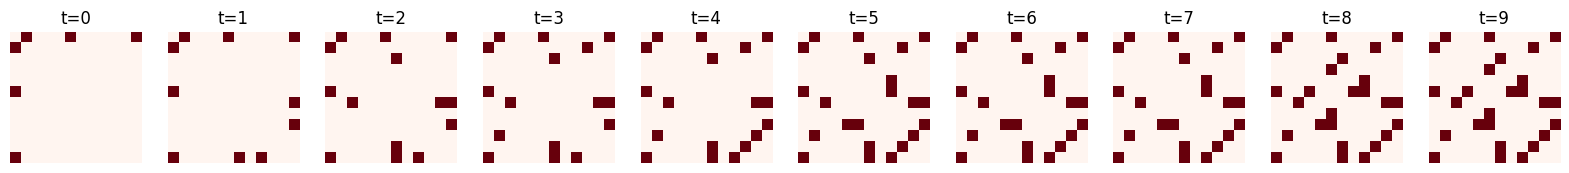

In [1]:
# ---
# 🚀 Tubular Automaton (TA) — Discrete Mockup
# Copy-paste directly into Colab.
# ---

import random
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Core data structures
# -----------------------------
class Tubule:
    """
    A tubule = edge between two nodes.
    It has:
      - weight (capacity / thickness)
      - state (semantic symbol or None)
    """
    def __init__(self, u, v, weight=1.0):
        self.u = u
        self.v = v
        self.weight = weight
        self.state = None  # placeholder for "symbol"

    def __repr__(self):
        return f"Tubule({self.u}->{self.v}, w={self.weight:.2f}, state={self.state})"

class TubularAutomaton:
    """
    Discrete Tubular Automaton (TA).
    - Graph of nodes connected by tubules.
    - Flows are symbols moving along tubules.
    - Updates happen in discrete steps.
    """
    def __init__(self, n_nodes, connectivity=0.3):
        self.n_nodes = n_nodes
        self.adj = {i: [] for i in range(n_nodes)}
        self.tubules = []

        # Random graph generation
        for i in range(n_nodes):
            for j in range(i+1, n_nodes):
                if random.random() < connectivity:
                    t = Tubule(i, j, weight=random.random())
                    self.tubules.append(t)
                    self.adj[i].append(t)
                    self.adj[j].append(t)

    def inject_symbol(self, node, symbol):
        """Place a symbol into all tubules leaving node"""
        for t in self.adj[node]:
            t.state = symbol

    def step(self):
        """
        Update rule (simplest version):
        - If a tubule has a symbol, propagate it to neighbors
        - Defects = thresholding: weak tubules drop the symbol
        """
        new_states = {}
        for t in self.tubules:
            if t.state is not None:
                # probabilistic propagation
                if random.random() < t.weight:
                    # choose neighbor node to pass symbol
                    neighbor = t.v if random.random() < 0.5 else t.u
                    for tub in self.adj[neighbor]:
                        if tub is not t:
                            new_states[tub] = t.state

        # update
        for t, s in new_states.items():
            t.state = s

    def snapshot(self):
        """Return a matrix (adjacency with states) for visualization"""
        mat = np.zeros((self.n_nodes, self.n_nodes))
        for t in self.tubules:
            if t.state is not None:
                mat[t.u, t.v] = 1
                mat[t.v, t.u] = 1
        return mat


# -----------------------------
# 2. Run simple experiment
# -----------------------------
TA = TubularAutomaton(n_nodes=12, connectivity=0.2)

# Inject a symbol at node 0
TA.inject_symbol(0, symbol="A")

n_steps = 10
snapshots = []
for _ in range(n_steps):
    snapshots.append(TA.snapshot())
    TA.step()

# -----------------------------
# 3. Visualize evolution
# -----------------------------
fig, axes = plt.subplots(1, n_steps, figsize=(20, 2))
for i, mat in enumerate(snapshots):
    axes[i].imshow(mat, cmap="Reds")
    axes[i].set_title(f"t={i}")
    axes[i].axis("off")
plt.show()


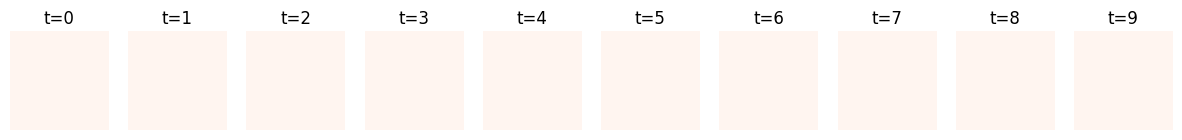

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
T = 10
grid = np.zeros((N, N))
weights = np.random.rand(N, N) * 0.2  # initial weak weights
symbols = np.zeros((N, N))
symbols[0, 0] = 1  # inject a symbol

history = []

for t in range(T):
    new_symbols = np.zeros_like(symbols)
    for i in range(N):
        for j in range(N):
            if symbols[i, j] > 0:
                # spread to neighbors
                for di, dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                    ni, nj = i+di, j+dj
                    if 0 <= ni < N and 0 <= nj < N:
                        if np.random.rand() < weights[ni, nj]:
                            new_symbols[ni, nj] = 1
                            # plasticity: strengthen used tubules
                            weights[ni, nj] = min(weights[ni, nj] + 0.05, 1.0)
    symbols = new_symbols
    history.append(symbols.copy())

fig, axes = plt.subplots(1, T, figsize=(15, 2))
for t in range(T):
    axes[t].imshow(history[t], cmap="Reds")
    axes[t].set_title(f"t={t}")
    axes[t].axis("off")
plt.show()


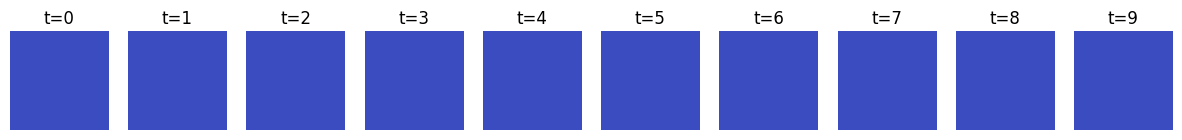

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
T = 10
grid_A = np.zeros((N, N))
grid_B = np.zeros((N, N))

grid_A[0, 0] = 1
grid_B[-1, -1] = 1

weights = np.random.rand(N, N) * 0.3
history = []

for t in range(T):
    new_A = np.zeros_like(grid_A)
    new_B = np.zeros_like(grid_B)
    for i in range(N):
        for j in range(N):
            for grid, new_grid in [(grid_A, new_A), (grid_B, new_B)]:
                if grid[i, j] > 0:
                    for di, dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                        ni, nj = i+di, j+dj
                        if 0 <= ni < N and 0 <= nj < N:
                            if np.random.rand() < weights[ni, nj]:
                                new_grid[ni, nj] = 1
    grid_A, grid_B = new_A, new_B
    combined = grid_A + 2*grid_B
    history.append(combined.copy())

fig, axes = plt.subplots(1, T, figsize=(15, 2))
for t in range(T):
    axes[t].imshow(history[t], cmap="coolwarm")
    axes[t].set_title(f"t={t}")
    axes[t].axis("off")
plt.show()


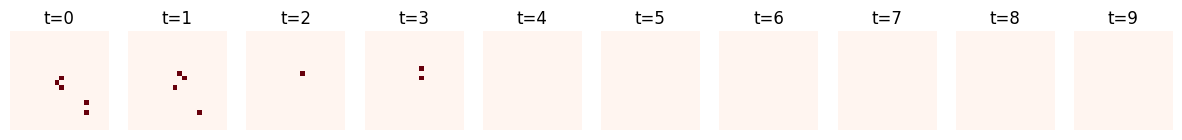

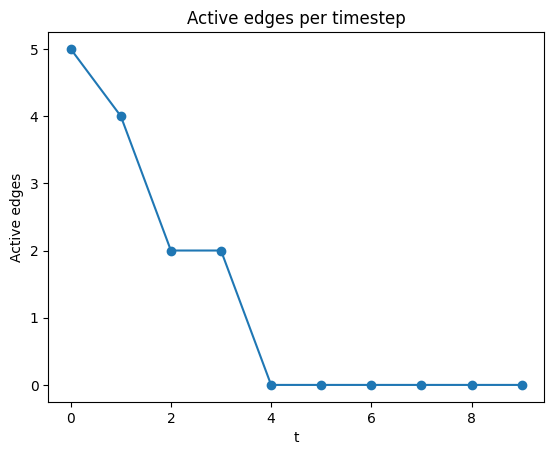

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
T = 10
symbols = np.zeros((N, N))

# inject multiple seeds
seeds = [(0,0),(5,5),(10,10),(15,15)]
for si, sj in seeds:
    symbols[si, sj] = 1

weights = np.random.rand(N, N) * 0.25
history, activity = [], []

for t in range(T):
    new_symbols = np.zeros_like(symbols)
    active_edges = 0
    for i in range(N):
        for j in range(N):
            if symbols[i, j] > 0:
                for di, dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                    ni, nj = i+di, j+dj
                    if 0 <= ni < N and 0 <= nj < N:
                        if np.random.rand() < weights[ni, nj]:
                            new_symbols[ni, nj] = 1
                            active_edges += 1
    activity.append(active_edges)
    symbols = new_symbols
    history.append(symbols.copy())

fig, axes = plt.subplots(1, T, figsize=(15, 2))
for t in range(T):
    axes[t].imshow(history[t], cmap="Reds")
    axes[t].set_title(f"t={t}")
    axes[t].axis("off")
plt.show()

plt.plot(activity, marker="o")
plt.title("Active edges per timestep")
plt.xlabel("t")
plt.ylabel("Active edges")
plt.show()


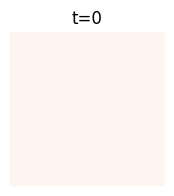

System stabilized at timestep: 1


In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
MAX_T = 50
symbols = np.zeros((N, N))
symbols[N//2, N//2] = 1  # center injection
weights = np.random.rand(N, N) * 0.3

history = []
stability_time = None

for t in range(MAX_T):
    new_symbols = np.zeros_like(symbols)
    for i in range(N):
        for j in range(N):
            if symbols[i, j] > 0:
                for di, dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                    ni, nj = i+di, j+dj
                    if 0 <= ni < N and 0 <= nj < N:
                        if np.random.rand() < weights[ni, nj]:
                            new_symbols[ni, nj] = 1
    if np.array_equal(new_symbols, symbols):
        stability_time = t
        break
    symbols = new_symbols
    history.append(symbols.copy())

fig, axes = plt.subplots(1, len(history), figsize=(15, 2))

# Handle the case where subplots returns a single Axes object
if len(history) == 1:
    axes.imshow(history[0], cmap="Reds")
    axes.set_title(f"t={0}")
    axes.axis("off")
else:
    for t in range(len(history)):
        axes[t].imshow(history[t], cmap="Reds")
        axes[t].set_title(f"t={t}")
        axes[t].axis("off")
plt.show()

print("System stabilized at timestep:", stability_time if stability_time else "Not stabilized")

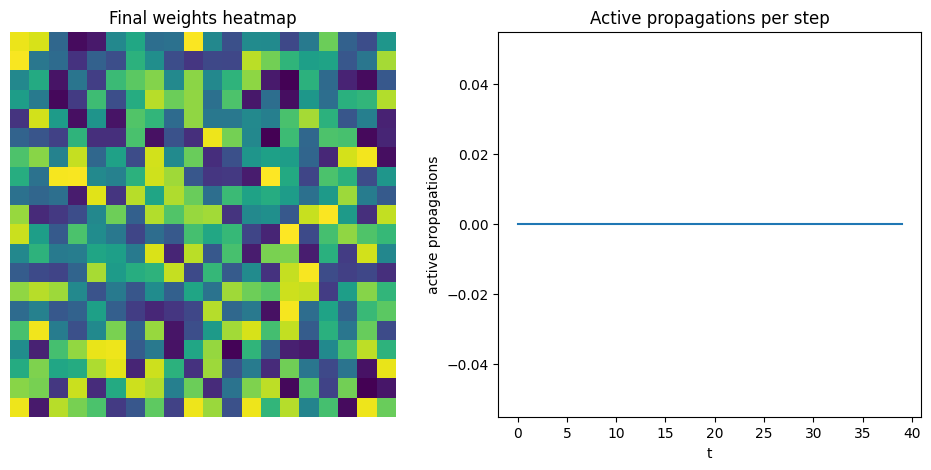

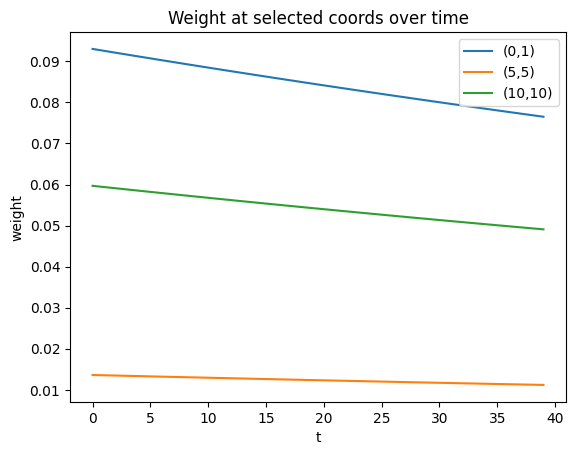

In [7]:
# Plasticity diagnostic cell
import numpy as np
import matplotlib.pyplot as plt

N = 20
T = 40
# initialize weights lower to see strengthening more clearly
weights = np.random.rand(N, N) * 0.1
symbols = np.zeros((N, N))
symbols[0, 0] = 1  # inject at corner

# plasticity params
plasticity_increment = 0.08
decay = 0.995  # small decay to avoid runaway growth

weight_history = []
activity_history = []

for t in range(T):
    new_symbols = np.zeros_like(symbols)
    active = 0
    for i in range(N):
        for j in range(N):
            if symbols[i, j] > 0:
                for di, dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                    ni, nj = i+di, j+dj
                    if 0 <= ni < N and 0 <= nj < N:
                        if np.random.rand() < weights[ni, nj]:
                            new_symbols[ni, nj] = 1
                            # strengthen the target tubule (plasticity)
                            weights[ni, nj] = min(weights[ni, nj] + plasticity_increment, 1.0)
                            active += 1
    # slight decay
    weights *= decay
    symbols = new_symbols
    weight_history.append(weights.copy())
    activity_history.append(active)

# visualize: final weight heatmap and average weight over time
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(weights, cmap='viridis')
ax[0].set_title('Final weights heatmap')
ax[0].axis('off')
ax[1].plot(np.array(activity_history))
ax[1].set_title('Active propagations per step')
ax[1].set_xlabel('t')
ax[1].set_ylabel('active propagations')
plt.show()

# visualize weight growth at two example coordinates
coords = [(0,1),(5,5),(10,10)]
for (ci,cj) in coords:
    vals = [wh[ci,cj] for wh in weight_history]
    plt.plot(vals, label=f'({ci},{cj})')
plt.legend()
plt.title('Weight at selected coords over time')
plt.xlabel('t')
plt.ylabel('weight')
plt.show()


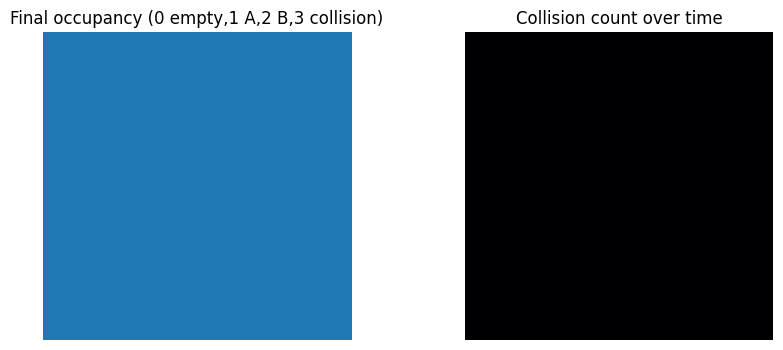

Total collisions (sum of counts): 0.0


In [8]:
# Collision diagnostic cell
import numpy as np
import matplotlib.pyplot as plt

N = 30
T = 30
A = np.zeros((N,N))
B = np.zeros((N,N))
A[2,2] = 1
B[-3,-3] = 1

weights = np.random.rand(N, N) * 0.25
collision_count = np.zeros((N,N))
history_vis = []

for t in range(T):
    new_A = np.zeros_like(A)
    new_B = np.zeros_like(B)
    for i in range(N):
        for j in range(N):
            if A[i,j] > 0:
                for di,dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                    ni,nj = i+di, j+dj
                    if 0 <= ni < N and 0 <= nj < N:
                        if np.random.rand() < weights[ni,nj]:
                            new_A[ni,nj] = 1
            if B[i,j] > 0:
                for di,dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                    ni,nj = i+di, j+dj
                    if 0 <= ni < N and 0 <= nj < N:
                        if np.random.rand() < weights[ni,nj]:
                            new_B[ni,nj] = 1
    A, B = new_A, new_B
    # record collisions where both A and B occupy same cell
    collisions = (A>0) & (B>0)
    collision_count += collisions.astype(int)
    # visualization grid: 0=empty,1=A,2=B,3=collision
    vis = np.zeros((N,N), dtype=int)
    vis[A>0] = 1
    vis[B>0] = 2
    vis[collisions] = 3
    history_vis.append(vis.copy())

# Show latest frame and total collision map
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(history_vis[-1], cmap='tab10')
plt.title('Final occupancy (0 empty,1 A,2 B,3 collision)')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(collision_count, cmap='magma')
plt.title('Collision count over time')
plt.axis('off')
plt.show()

print("Total collisions (sum of counts):", collision_count.sum())


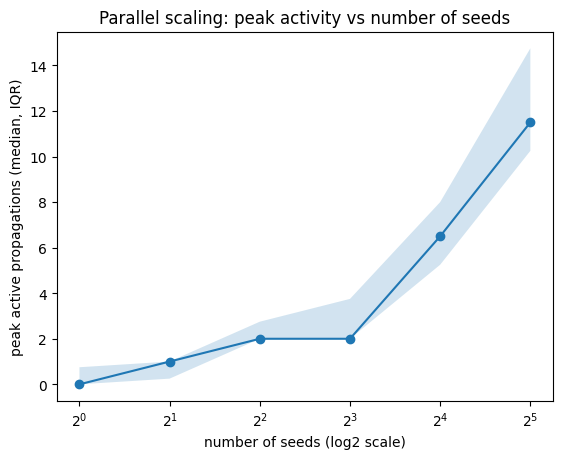

In [10]:
# Parallel-head scaling cell
import numpy as np
import matplotlib.pyplot as plt

def run_parallel(seeds, N=50, T=30, weight_scale=0.2):
    weights = np.random.rand(N,N) * weight_scale
    symbols = np.zeros((N,N))
    for (si,sj) in seeds:
        symbols[si,sj] = 1
    activity = []
    for t in range(T):
        new = np.zeros_like(symbols)
        active = 0
        for i in range(N):
            for j in range(N):
                if symbols[i,j] > 0:
                    for di,dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                        ni,nj = i+di, j+dj
                        if 0 <= ni < N and 0 <= nj < N:
                            if np.random.rand() < weights[ni,nj]:
                                new[ni,nj] = 1
                                active += 1
        symbols = new
        activity.append(active)
    return activity

# sweep seed counts
seed_counts = [1,2,4,8,16,32]
trials = 10
peak_activity = {k:[] for k in seed_counts}

for k in seed_counts:
    for tr in range(trials):
        # spread seeds across grid randomly but non-overlapping
        coords = []
        while len(coords) < k:
            p = (np.random.randint(0,50), np.random.randint(0,50))
            if p not in coords: coords.append(p)
        act = run_parallel(coords)
        peak_activity[k].append(max(act))

# plot median and IQR
medians = [np.median(peak_activity[k]) for k in seed_counts]
q1 = [np.percentile(peak_activity[k],25) for k in seed_counts]
q3 = [np.percentile(peak_activity[k],75) for k in seed_counts]

plt.fill_between(seed_counts, q1, q3, alpha=0.2)
plt.plot(seed_counts, medians, marker='o')
plt.xscale('log', base=2)
plt.xlabel('number of seeds (log2 scale)')
plt.ylabel('peak active propagations (median, IQR)')
plt.title('Parallel scaling: peak activity vs number of seeds')
plt.show()

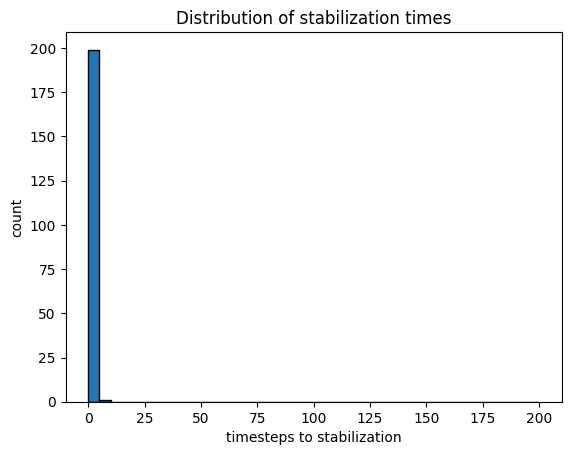

mean: 0.47 median: 0.0 max: 7


In [11]:
# Halting distribution cell
import numpy as np
import matplotlib.pyplot as plt

def halting_time(N=30, max_t=100, weight_base=0.25, seed_coord=None):
    weights = np.random.rand(N,N) * weight_base
    symbols = np.zeros((N,N))
    if seed_coord is None:
        symbols[N//2,N//2] = 1
    else:
        symbols[seed_coord] = 1
    for t in range(max_t):
        new = np.zeros_like(symbols)
        changed = False
        for i in range(N):
            for j in range(N):
                if symbols[i,j] > 0:
                    for di,dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                        ni,nj = i+di, j+dj
                        if 0 <= ni < N and 0 <= nj < N:
                            if np.random.rand() < weights[ni,nj]:
                                new[ni,nj] = 1
                                changed = True
        if not changed:
            return t
        symbols = new
    return max_t

# run many trials
trials = 200
times = []
for _ in range(trials):
    times.append(halting_time(N=30, max_t=200, weight_base=0.18))  # tune weight_base to see varied behavior

# show histogram + summary stats
plt.hist(times, bins=range(0,201,5), edgecolor='black')
plt.title('Distribution of stabilization times')
plt.xlabel('timesteps to stabilization')
plt.ylabel('count')
plt.show()

print("mean:", np.mean(times), "median:", np.median(times), "max:", np.max(times))


--- Step 0 ---
  Tubule (0, 2): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 3): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 5): Buffer ['A', None, None, None, None, None, None, None], Head 1
--- Step 1 ---
  Tubule (0, 2): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 3): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 5): Buffer ['A', None, None, None, None, None, None, None], Head 1
--- Step 2 ---
  Tubule (0, 2): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 3): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 5): Buffer ['A', None, None, None, None, None, None, None], Head 1
--- Step 3 ---
  Tubule (0, 2): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 3): Buffer ['A', None, None, None, None, None, None, None], Head 1
  Tubule (0, 5): Buffer ['A', None, None, None, None, None, 

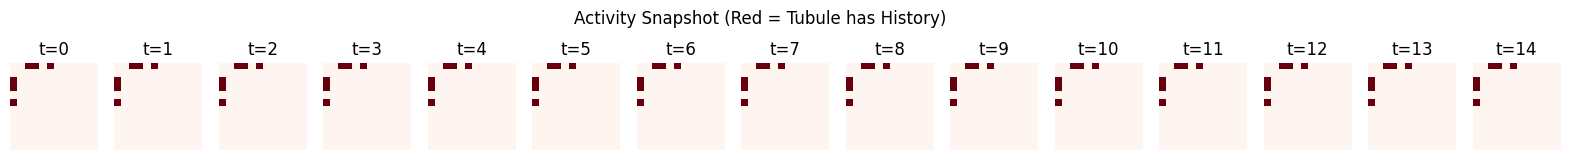

Experiment complete. Observe if activity persists longer than in the non-buffered version.


In [12]:
# Cell 1: Tubular Automaton with Monadic Circular Buffer Heads

import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class TubuleWithBuffer:
    """
    A tubule upgraded with a monadic circular buffer head.
    - buffer: A fixed-size circular buffer storing recent symbols.
    - head_idx: The current position in the buffer (the 'head').
    - weight: The strength of the tubule.
    """
    def __init__(self, u, v, weight=0.5, buffer_size=5):
        self.u = u
        self.v = v
        self.weight = weight
        # Initialize buffer with None (empty) and set head to 0
        self.buffer = [None] * buffer_size
        self.head_idx = 0
        self.buffer_size = buffer_size

    def write_symbol(self, symbol):
        """Write a symbol to the current head position and advance the head."""
        self.buffer[self.head_idx] = symbol
        self.head_idx = (self.head_idx + 1) % self.buffer_size

    def get_current_symbol(self):
        """Read the symbol at the current head position."""
        return self.buffer[self.head_idx]

    def get_buffer_state(self):
        """Return a copy of the buffer for visualization/analysis."""
        return self.buffer.copy()

    def __repr__(self):
        return f"Tubule({self.u}->{self.v}, w={self.weight:.2f}, buffer={self.buffer}, head={self.head_idx})"

class TubularAutomatonWithBuffers:
    """
    TA where each tubule has a monadic circular buffer head.
    """
    def __init__(self, n_nodes, connectivity=0.3, buffer_size=5):
        self.n_nodes = n_nodes
        self.buffer_size = buffer_size
        self.adj = {i: [] for i in range(n_nodes)}
        self.tubules = []
        # Random graph generation
        for i in range(n_nodes):
            for j in range(i+1, n_nodes):
                if random.random() < connectivity:
                    t = TubuleWithBuffer(i, j, weight=random.uniform(0.4, 0.8), buffer_size=buffer_size)
                    self.tubules.append(t)
                    self.adj[i].append(t)
                    self.adj[j].append(t)

    def inject_symbol(self, node, symbol):
        """Inject a symbol into all tubules connected to the node."""
        for t in self.adj[node]:
            t.write_symbol(symbol)

    def step(self):
        """
        Update rule:
        - For each tubule, if its current symbol is not None, attempt to propagate it.
        - Propagation is probabilistic based on tubule weight.
        - If propagation succeeds, write the symbol to the neighbor's tubules.
        """
        # We'll collect propagation events to avoid modifying while iterating
        propagation_events = []

        for t in self.tubules:
            current_symbol = t.get_current_symbol()
            if current_symbol is not None:
                # Probabilistic propagation to both ends of the tubule
                for target_node in [t.u, t.v]:
                    if random.random() < t.weight:
                        propagation_events.append((target_node, current_symbol))

        # Execute the propagation events
        for target_node, symbol in propagation_events:
            for t in self.adj[target_node]:
                t.write_symbol(symbol)

    def snapshot(self):
        """Return a matrix for visualization. Cell value is 1 if buffer has ANY symbol, else 0."""
        mat = np.zeros((self.n_nodes, self.n_nodes))
        for t in self.tubules:
            # If any position in the buffer is not None, consider it active
            if any(slot is not None for slot in t.buffer):
                mat[t.u, t.v] = 1
                mat[t.v, t.u] = 1
        return mat

    def get_buffer_snapshot(self):
        """Return a detailed snapshot showing the state of each tubule's buffer."""
        detailed_snapshot = []
        for t in self.tubules:
            detailed_snapshot.append({
                'edge': (t.u, t.v),
                'buffer': t.get_buffer_state(),
                'head': t.head_idx
            })
        return detailed_snapshot

# -----------------------------
# Run the Experiment
# -----------------------------

# Initialize the TA with buffer-equipped tubules
TA_buffer = TubularAutomatonWithBuffers(n_nodes=12, connectivity=0.4, buffer_size=8)

# Inject a symbol at node 0
TA_buffer.inject_symbol(0, symbol="A")

n_steps = 15
snapshots = []

for step in range(n_steps):
    print(f"--- Step {step} ---")
    # Take a detailed snapshot to see buffer contents
    detailed = TA_buffer.get_buffer_snapshot()
    for tubule_info in detailed[:3]:  # Print first 3 tubules for brevity
        print(f"  Tubule {tubule_info['edge']}: Buffer {tubule_info['buffer']}, Head {tubule_info['head']}")

    snapshots.append(TA_buffer.snapshot())
    TA_buffer.step()

# Visualize the overall activity (whether a tubule has any history)
fig, axes = plt.subplots(1, len(snapshots), figsize=(20, 2))
for i, mat in enumerate(snapshots):
    axes[i].imshow(mat, cmap="Reds")
    axes[i].set_title(f"t={i}")
    axes[i].axis("off")
plt.suptitle("Activity Snapshot (Red = Tubule has History)")
plt.show()

print("Experiment complete. Observe if activity persists longer than in the non-buffered version.")

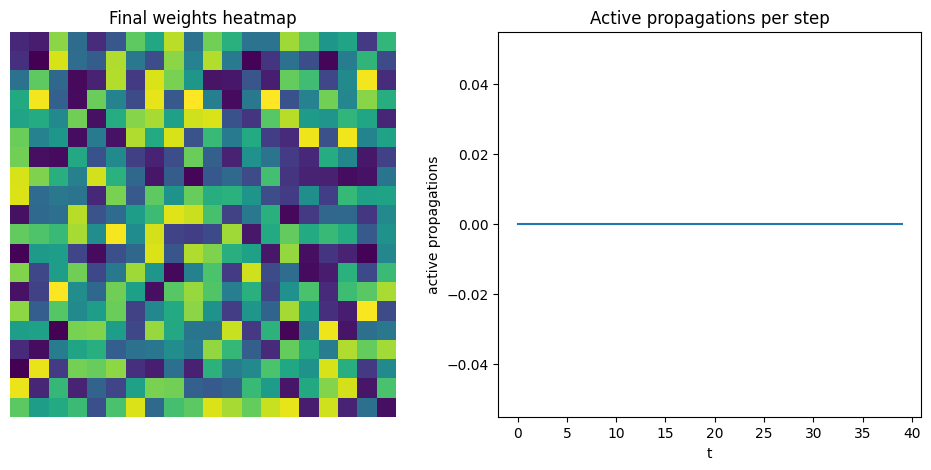

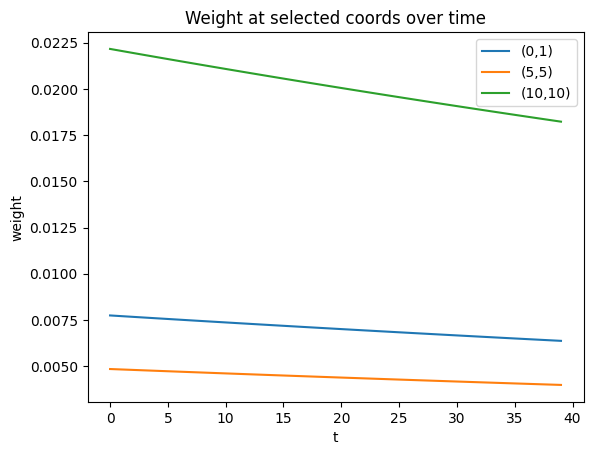

In [14]:
# Plasticity diagnostic cell
import numpy as np
import matplotlib.pyplot as plt

N = 20
T = 40
# initialize weights lower to see strengthening more clearly
weights = np.random.rand(N, N) * 0.1
symbols = np.zeros((N, N))
symbols[0, 0] = 1  # inject at corner

# plasticity params
plasticity_increment = 0.08
decay = 0.995  # small decay to avoid runaway growth

weight_history = []
activity_history = []

for t in range(T):
    new_symbols = np.zeros_like(symbols)
    active = 0
    for i in range(N):
        for j in range(N):
            if symbols[i, j] > 0:
                for di, dj in [(1,0),(-1,0),(0,1),(0,-1)]:
                    # Add periodic boundary conditions (toroidal topology)
                    ni, nj = (i+di) % N, (j+dj) % N

                    if 0 <= ni < N and 0 <= nj < N:
                        if np.random.rand() < weights[ni, nj]:
                            new_symbols[ni, nj] = 1
                            # strengthen the target tubule (plasticity)
                            weights[ni, nj] = min(weights[ni, nj] + plasticity_increment, 1.0)
                            active += 1
    # slight decay
    weights *= decay
    symbols = new_symbols
    weight_history.append(weights.copy())
    activity_history.append(active)

# visualize: final weight heatmap and average weight over time
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(weights, cmap='viridis')
ax[0].set_title('Final weights heatmap')
ax[0].axis('off')
ax[1].plot(np.array(activity_history))
ax[1].set_title('Active propagations per step')
ax[1].set_xlabel('t')
ax[1].set_ylabel('active propagations')
plt.show()

# visualize weight growth at two example coordinates
coords = [(0,1),(5,5),(10,10)]
for (ci,cj) in coords:
    vals = [wh[ci,cj] for wh in weight_history]
    plt.plot(vals, label=f'({ci},{cj})')
plt.legend()
plt.title('Weight at selected coords over time')
plt.xlabel('t')
plt.ylabel('weight')
plt.show()

In [15]:
# Track "invariant" measures across the grid
def compute_local_symmetry(weights, i, j):
    # measure local rotational/translational symmetry
    pass

In [16]:
# Look for self-similar patterns at different scales
def multiscale_analysis(weight_history):
    # downsample grid and look for preserved structures
    pass